## Deep Learning Image Classification Model (Keras + CNN)

## Asian vs African Elephants Dataset

https://www.kaggle.com/datasets/vivmankar/asian-vs-african-elephant-image-classification

Dataset details :
- Number of classes: 2 (Asian elephant and African elephant )
- Number of images: 1028
- Image shape range: ( 100, 100) to (4992, 3328)
- To increase complexity the train set contains less than 5% mislabeled images, while all images in the test set have the correct label.

## Python Liabraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # for image augmentation
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import matplotlib.pyplot as plt

## Data (Image) Preprocessing

In [3]:
img_size = 150  # Height and width
batch_size = 32


print("Training data :")

train_datagen = ImageDataGenerator(
    rescale = 1./255, # change the pixels from 0-255 to 0-1
    shear_range = 0.2, # cut into pecies
    zoom_range = 0.2,  # To zoom the image
    horizontal_flip = True  # to flip the image 
)

train_generator = train_datagen.flow_from_directory(r"C:\Users\Pc\OneDrive\Desktop\Alex..New..Folder\Deep_Learning\CNN_Project_Binary\dataset\train",
    target_size = (img_size,img_size),  # Height , width
    batch_size = batch_size,
    class_mode = "binary"
)

print("Validation data :")

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    r"C:\Users\Pc\OneDrive\Desktop\Alex..New..Folder\Deep_Learning\CNN_Project_Binary\dataset\test",
    target_size = (img_size,img_size),
    batch_size = batch_size,
    class_mode = "binary"
)

Training data :
Found 840 images belonging to 2 classes.
Validation data :
Found 188 images belonging to 2 classes.


## CNN  Model Architecture

In [5]:
model = Sequential([
    Conv2D(32,(3,3),activation="relu", input_shape = (150,150,3)),
    MaxPooling2D(2,2),
    # 32 is number of filter (neuron)
    # (3,3) size of filter
    # activation relu because it is a hidden layer
    # RGB image = 3 channels
    # Balck & White = 1 channel

    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    # number of neurons increasing in each layer for better working with paterns
    
    Flatten(), # to make it into 1D array
    Dense(128,activation="relu"),
    # Last layer will have only one neuron with probability as output
    Dropout(0.5),
    Dense(1,activation="sigmoid")
])

In [6]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model

In [7]:
model.compile(
    optimizer = Adam(learning_rate=0.0001),  # Learning rate - medium is better , how fast should learn
    loss='binary_crossentropy',
    metrics=['accuracy','precision','recall']
)

## Train the Model

In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=15,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)  # Here history variable is a dictionary having the results of Epoch run saved

Epoch 1/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 327ms/step - accuracy: 0.5619 - loss: 0.6801 - precision: 0.5762 - recall: 0.4350 - val_accuracy: 0.6313 - val_loss: 0.6549 - val_precision: 0.8696 - val_recall: 0.2632
Epoch 2/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.5000 - loss: 0.7033 - precision: 1.0000 - recall: 0.2000 - val_accuracy: 0.6062 - val_loss: 0.6631 - val_precision: 0.8095 - val_recall: 0.2237
Epoch 3/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 300ms/step - accuracy: 0.5644 - loss: 0.6784 - precision: 0.5734 - recall: 0.5111 - val_accuracy: 0.6875 - val_loss: 0.6326 - val_precision: 0.6790 - val_recall: 0.6962
Epoch 4/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6250 - loss: 0.6577 - precision: 0.6667 - recall: 0.4000 - val_accuracy: 0.6750 - val_loss: 0.6342 - val_precision: 0.6962 - val_recall: 0.6627
Epoch 5/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 303ms/step - accuracy: 0.5804 - loss: 0.6722 - precision: 0.5721 - recall: 0.6386 - val_accuracy: 0.6812 - val_loss: 0.63

## Ploting Training results

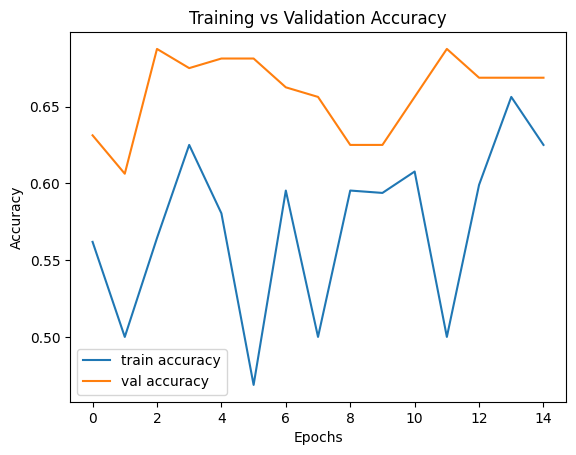

In [10]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

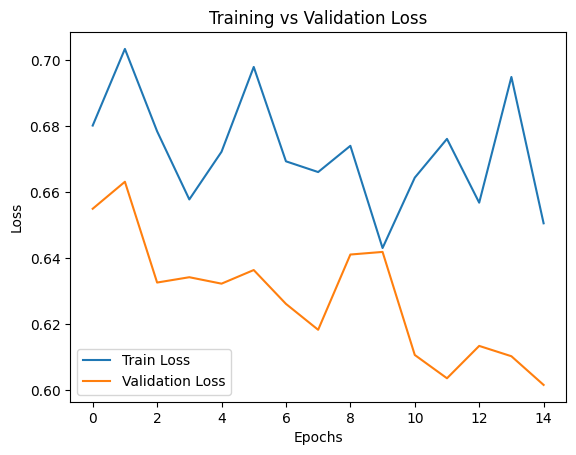

In [11]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

## Test on New Image

In [12]:
train_generator.class_indices

{'African': 0, 'Asian': 1}

In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(r"C:\Users\Pc\OneDrive\Desktop\Alex..New..Folder\Deep_Learning\CNN_Project_Binary\African_elephant.jpg", target_size=(150,150))
img = image.img_to_array(img)  # Changing the image into an array
img = img / 255.0  # rescaling image
img = np.expand_dims(img, axis=0)  # axis=0 means row # np.expand_dims is for expanding (batch size) - (batchsize,img,axis=0)

prediction = model.predict(img)

if prediction[0] > 0.5:  # run this - train_generator.class_indices - to get {"cat"-0,"dog-1"}
    print("Asian_Elephant")
else:
    print("African_Elephant")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
African_Elephant


### Correct Prediction as like the image in testing

In [17]:
prediction

array([[0.4228939]], dtype=float32)

In [20]:
model.save("African_Asian_Elephant_cnn_model.h5")

### Final Conclusion :

Your validation accuracy steadily improves and stabilizes around 66–69%, which means your model is learning useful patterns

Precision vs Recall Imbalance :

- You can see fluctuations like:
- High precision, low recall (model is conservative)
- High recall, low precision (model guesses too many positives)
- Later epochs stabilize around:

- val_precision ≈ 0.63–0.70  
- val_recall ≈ 0.64–0.71


This is actually good balance, especially for binary classification.

This project successfully demonstrates building an end-to-end deep learning image classification system using CNNs. The dataset was preprocessed with augmentation techniques to improve performance. The model achieved around 68% accuracy with balanced precision and recall.